In [4]:
#import Libary yang di butuhkan
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.metrics import accuracy_score
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from google.colab import files
uploaded = files.upload()

In [56]:
np.random.seed(123)

In [5]:
data = pd.read_csv("S:\Learning\MATA KULIAH\DATA MINING\Klasifikasi Teks (NLP) menggunakan Naive Bayes dan SVM dengan Python\Review Smartphone.csv")
data.head()

,user,ulasan,rating,label,tanggal
0,Juwairiah Juwairiah,Aplikasi shopee aku kok gak bisa gunain gratis...,1,negatif,06 Maret 2021
1,Sabyan Keisha,Menyebalkan vocer penguna baru tidak bisa di p...,1,negatif,12 Maret 2021
2,Teno Tee,"Saya sebagai penjual kecewa, penarikan saldo m...",1,negatif,27 Februari 2021
3,Nana nae,Aplukasi apa sih ini disuruh buat nama uda gue...,1,negatif,03 Maret 2021
4,Nurul Hamidah,Makin kesini Shoppe makin gak jelas. Apaan kab...,1,negatif,14 Maret 2021


In [6]:
#Menghilangkan tanda baca dan angka
def remove_punctuation_and_number(text):
    '''a function for removing punctuation'''
    import string
    import re
    for sp in string.punctuation:
        text = text.replace(sp, " ")
    text = re.sub(r"\d+","",text)    
    return text.replace('/\s\s+/g', ' ')
    
    data['ulasan'] = data['ulasan'].apply(remove_punctuation_and_number)

In [99]:
#menghilangkan stopwords
sw = ["aja","agan","barang","beli","baru","ada","adalah","ajaa","akan","aku","atas","buat","boss","agak","agar","apa","biar","bsa","alhmdulillah","alhamdulilah","akhir","allah","ane","arn","atau","audah","bang","aaaa","about","adik","ah","admin","and","as","bakalan","barank","amin","begini","begitu","beberapa"]

def stopwords(text):
    '''a function for removing the stopword'''
    import re
    text = [word.lower() for word in text.split()]
    for word in text:
        for stop in sw:
            if word==stop:
                text.remove(word)
    text = " ".join(text)
    text = re.sub(r'(.+?)\1+', r'\1',text)
    return text
    
    data['ulasan'] = data['ulasan'].apply(stopwords)

In [7]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    text = [stemmer.stem('word') for word in text.split()]
    return " ".join(text)
    data['ulasan'] = data['ulasan'].apply(stemming)

    #Analisa Hasil
    positif_kuat_data = data[data['positif_kuat']==1]
    positif_data = data[data['positif']==1]
    cenderung_positif_data = data[data['cenderung_positif']==1]
    cenderung_negatif_data = data[data['cenderung_negatif']==1]
    negatif_data = data[data['negatif']==1]
    negatif_kuat_data = data[data['negatif_kuat']==1]

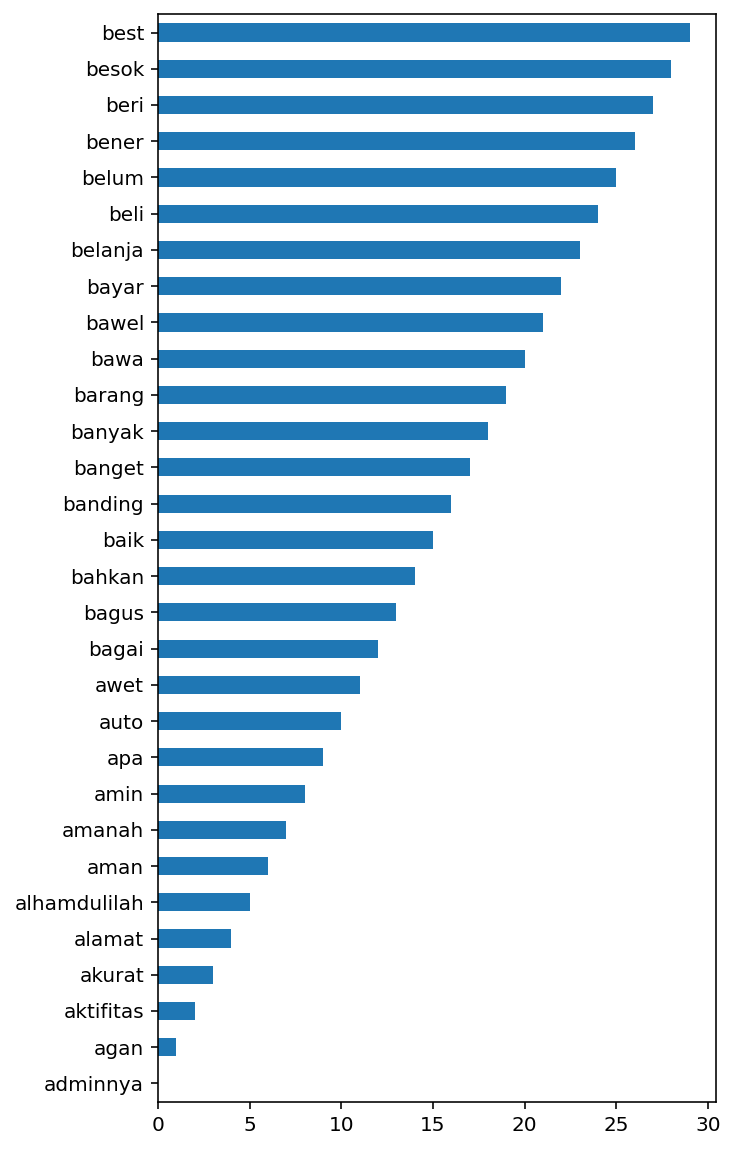

In [65]:
#positif kuat
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(['best besok beri bener belum beli belanja bayar bawel bawa barang banyak banget banding baik bahkan bagus bagai awet auto apa amin amanah aman alhamdulilah alamat akurat aktifitas agan adminnya'])
dictionary = tfidf_vectorizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=True)
top_vacab = vocab_bef_stem.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10))

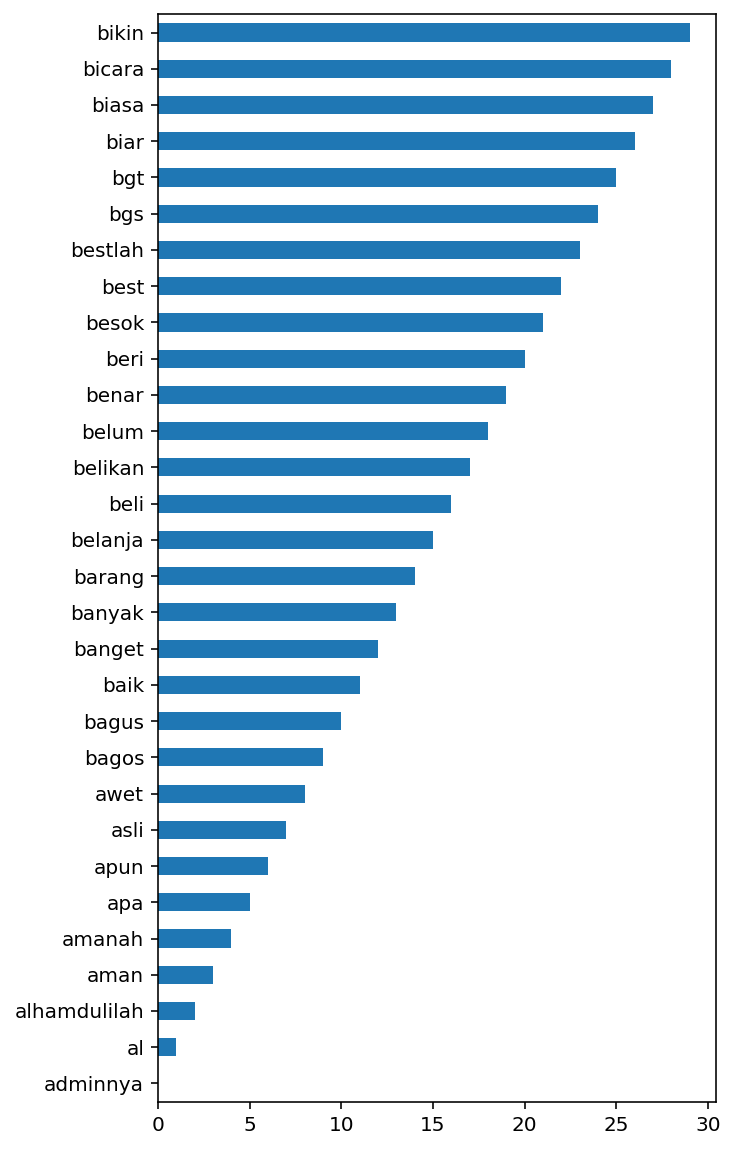

In [66]:
#positif
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(['bikin bicara biar biasa bgt bgs bestlah best besok beri benar belum belikan beli belanja barang banyak banget baik bagus bagos awet asli apun apa amanah aman alhamdulilah al adminnya'])
dictionary = tfidf_vectorizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=True)
top_vacab = vocab_bef_stem.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10))

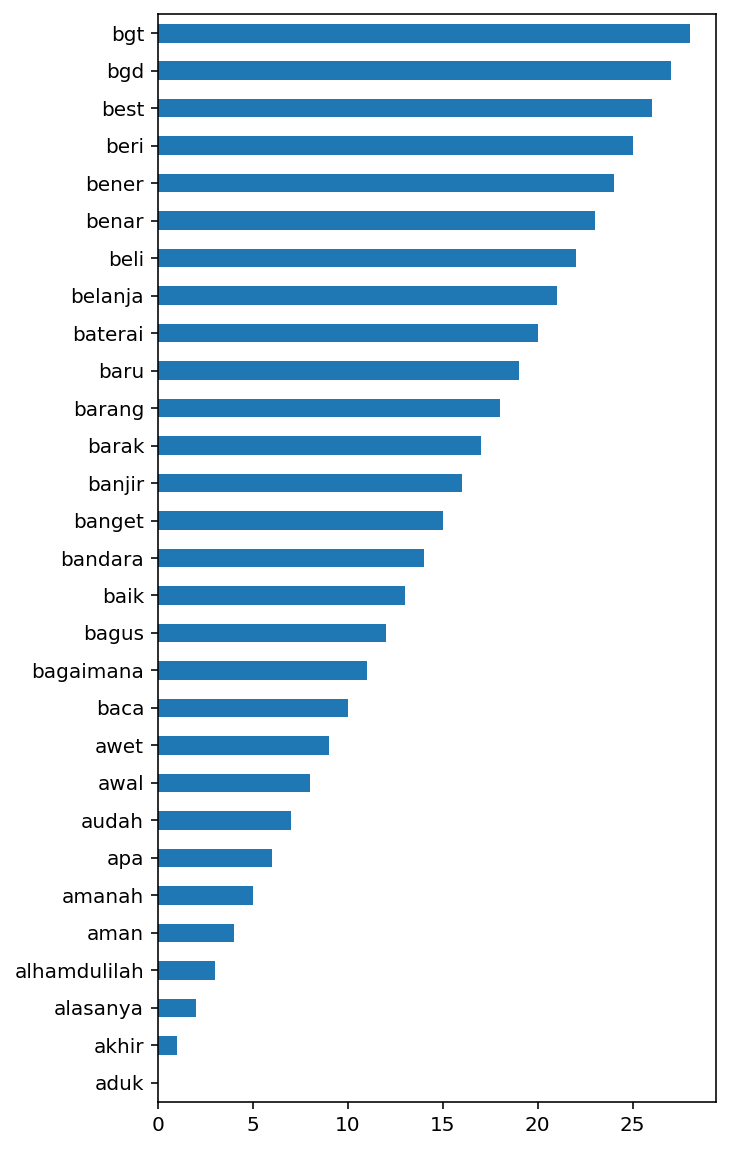

In [67]:
# Cenderung positif
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(['bgt bgd best beri bener benar beli belanja baterai baru barang barak banjir banget bandara baik bagus bagaimana baca awet awal audah apa amanah aman alhamdulilah alasanya akhir aduk'])
dictionary = tfidf_vectorizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=True)
top_vacab = vocab_bef_stem.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10))

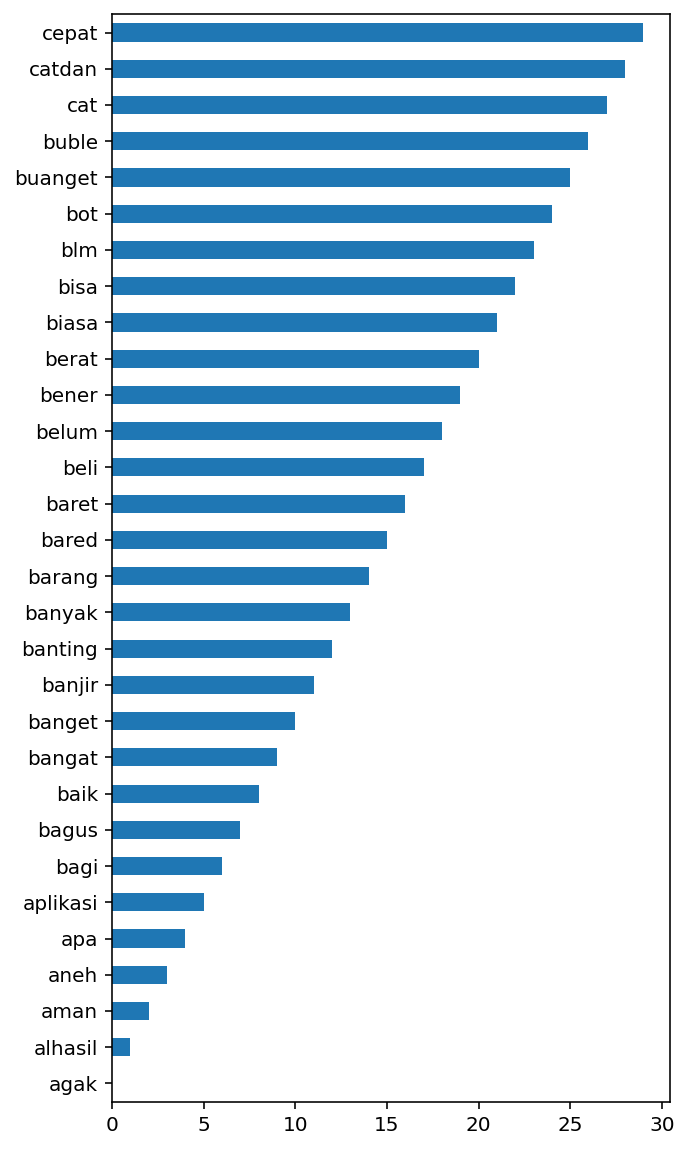

In [68]:
#Cenderung Negatif
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(['cepat catdan cat buble buanget bot blm bisa biasa berat bener belum beli baret bared barang banyak banting banjir banget bangat baik bagus bagi aplikasi apa aneh aman alhasil agak'])
dictionary = tfidf_vectorizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=True)
top_vacab = vocab_bef_stem.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10))

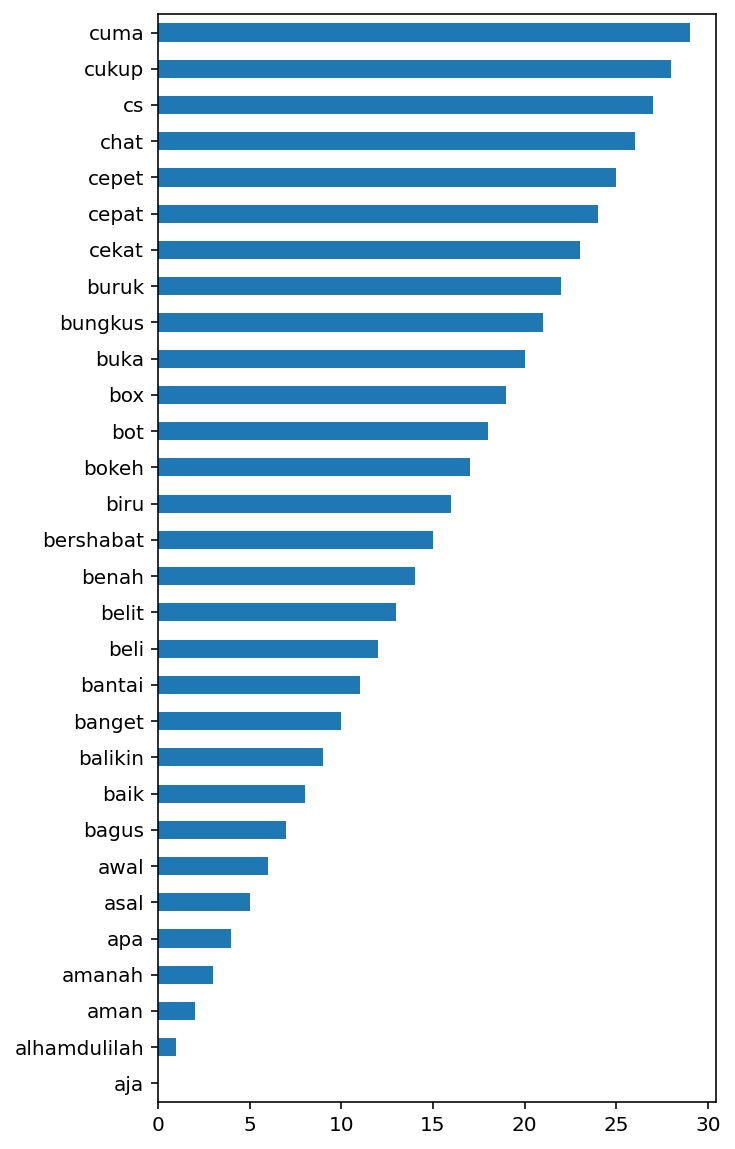

In [69]:
#Negatif
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(['cuma cukup cs chat cepet cepat cekat buruk bungkus buka box bot bokeh biru bershabat benah belit beli bantai banget balikin baik bagus awal asal apa amanah aman alhamdulilah aja'])
dictionary = tfidf_vectorizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=True)
top_vacab = vocab_bef_stem.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10)) 

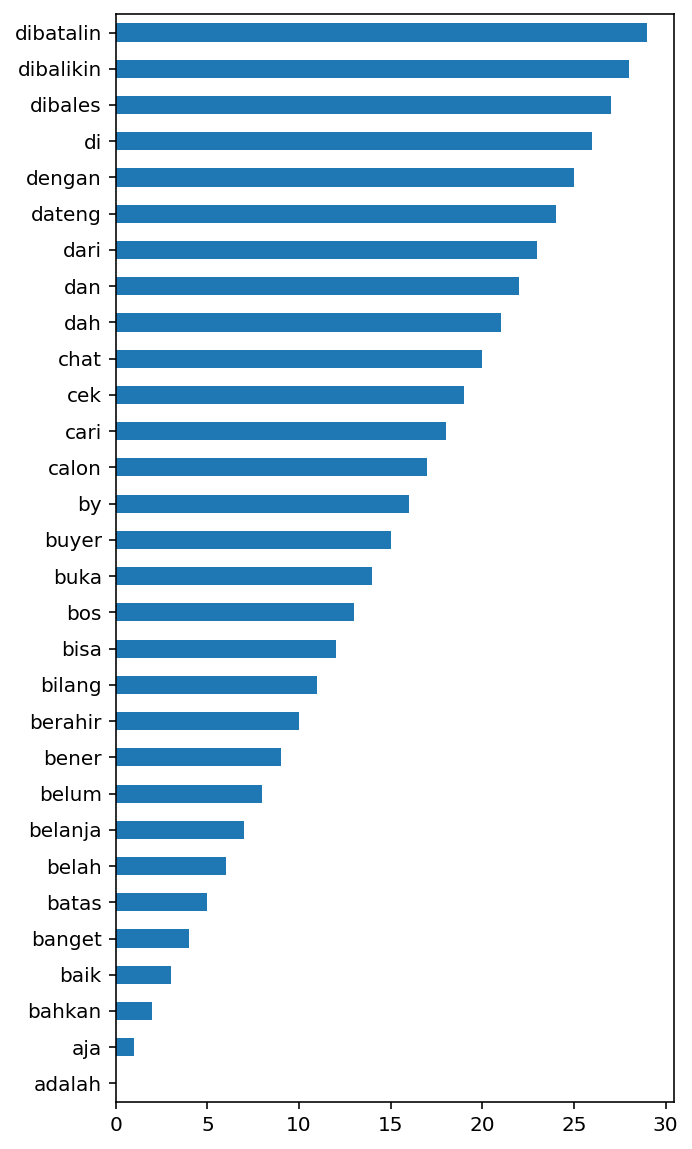

In [70]:
#Negatif kuat
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(['adalah aja bahkan baik banget batas belah belanja belum bener berahir bilang bisa bos buka buyer by calon cari cek chat dah dan dari dateng dengan di dibales dibalikin dibatalin'])
dictionary = tfidf_vectorizer.vocabulary_.items()  
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=True)
top_vacab = vocab_bef_stem.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [90]:
#membagi dataset menjadi 70% training set dan 30% test set
Train_X, Test_X, Train_Y, Test_Y = train_test_split(data['ulasan'], data['label'], test_size = 0.2)

In [91]:
#Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['ulasan'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [92]:
#Menggunakan Naive Bayes untuk memprediksi hasil
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score ->",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score -> 79.421768707483


In [93]:
#Menggunakan SVM untuk memprediksi hasil
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  84.01360544217688
